In [3]:
!pip install pafy
!sudo pip install --upgrade youtube_dl

     |████████████████████████████████| 1.9MB 3.9MB/s 


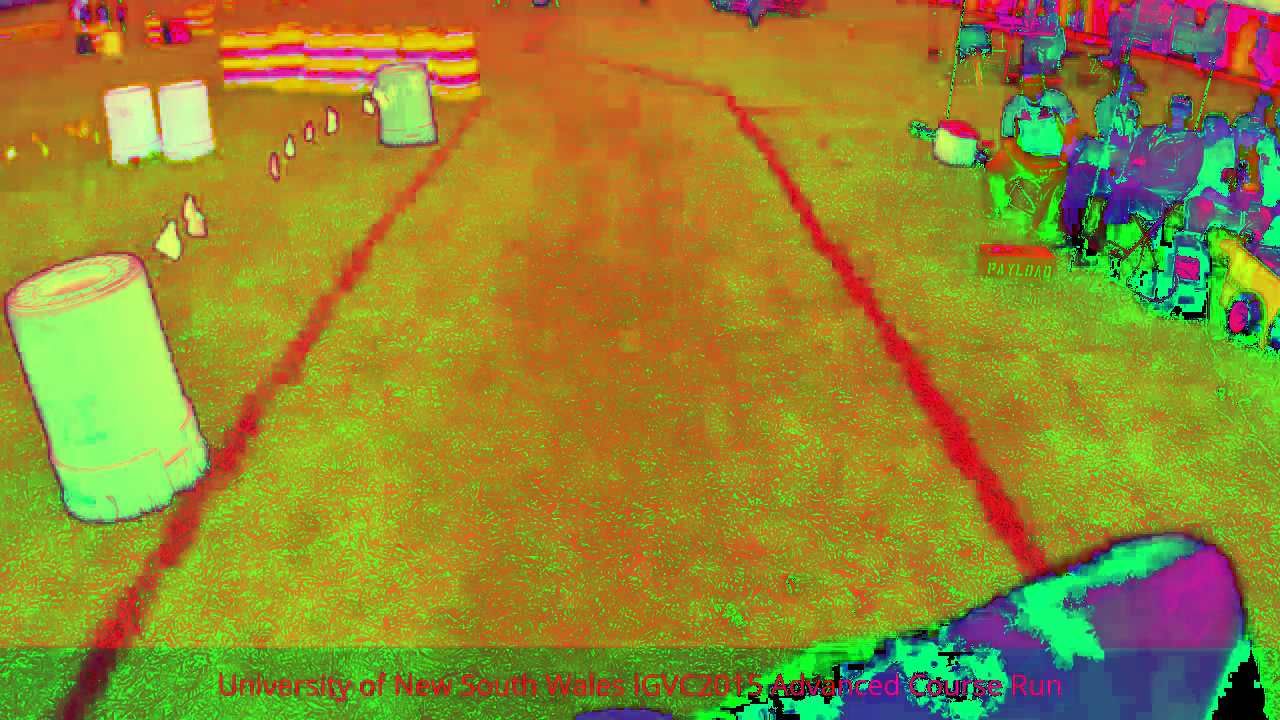

In [4]:
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import numpy as np
import pafy

url = 'https://www.youtube.com/watch?v=A9BVr7kltl8'
videoPafy = pafy.new(url)
best = videoPafy.getbest(preftype="mp4")

video=cv2.VideoCapture(best.url)
if (True):
    ret,frame = video.read()
    frame_hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    cv2_imshow(frame_hsv) 

video.release()


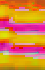

In [5]:
roi = frame[25:95,295:340]
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV )

cv2_imshow(roi_hsv)

In [6]:
roi_hist = cv2.calcHist([roi_hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

res = cv2.calcBackProject([frame_hsv],[0,1],roi_hist,[0,180,0,256],1)

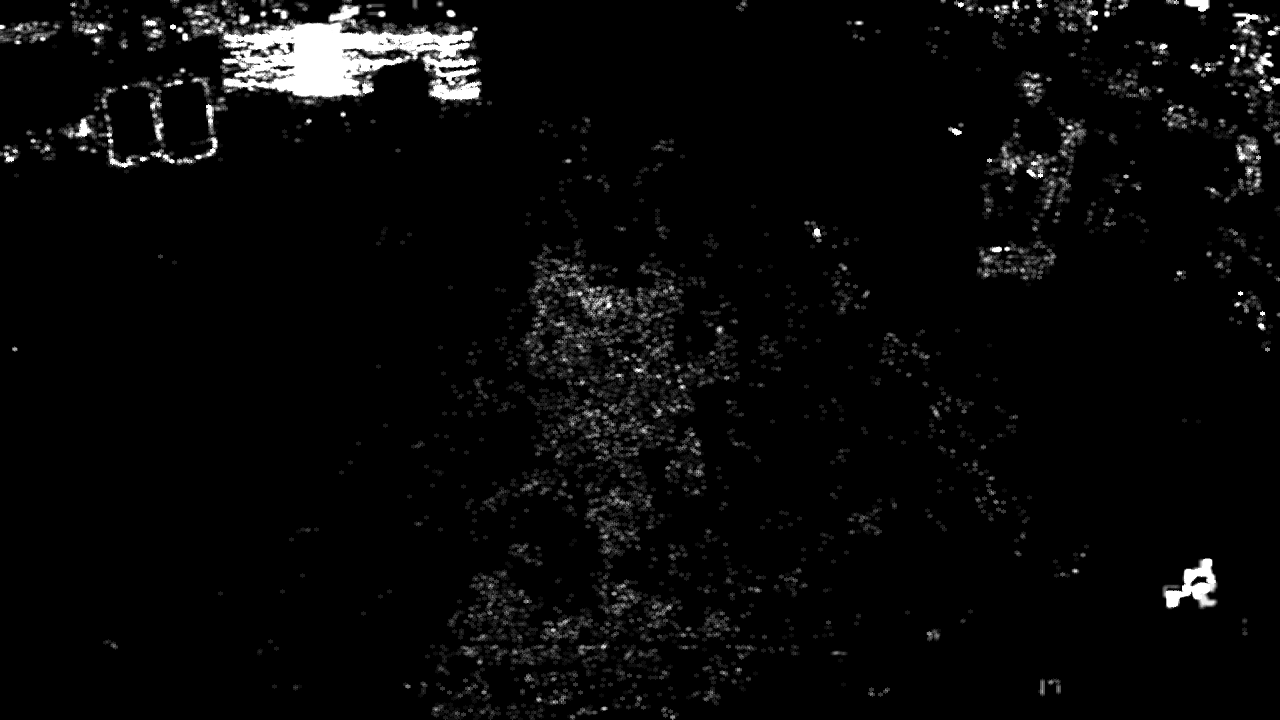

In [7]:
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
cv2.filter2D(res, -1, disc, res)

cv2_imshow(res)

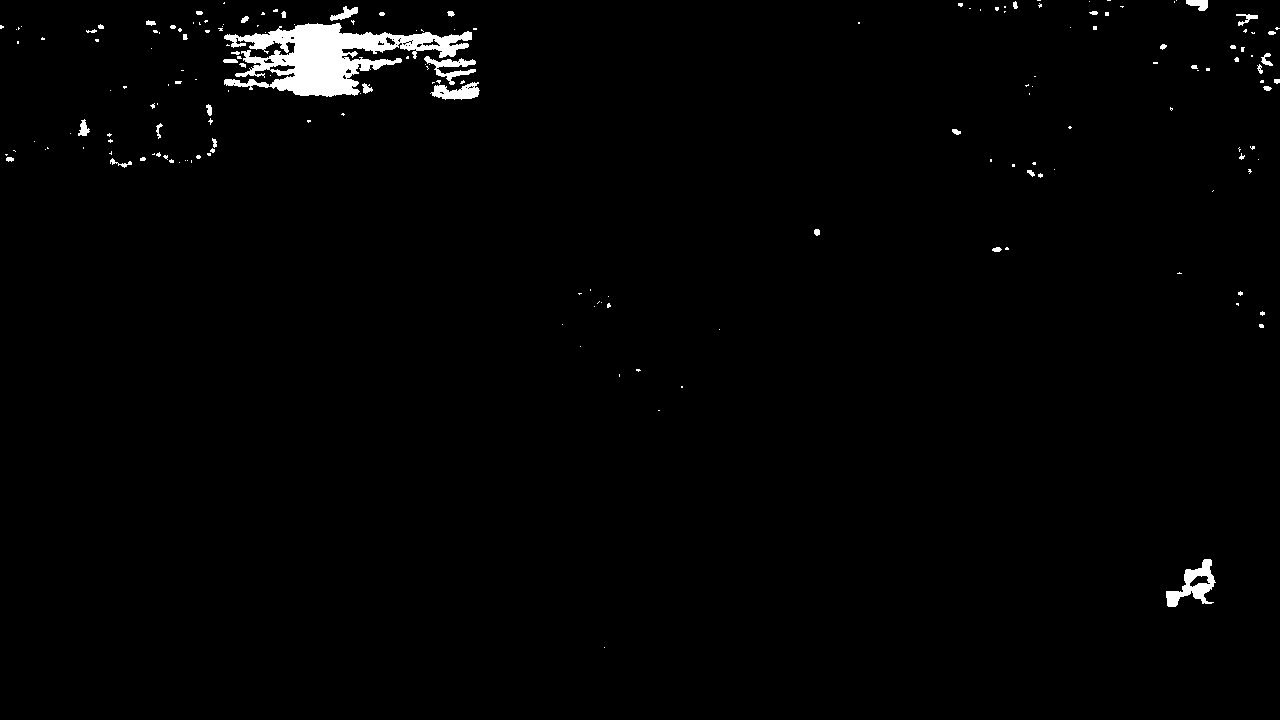

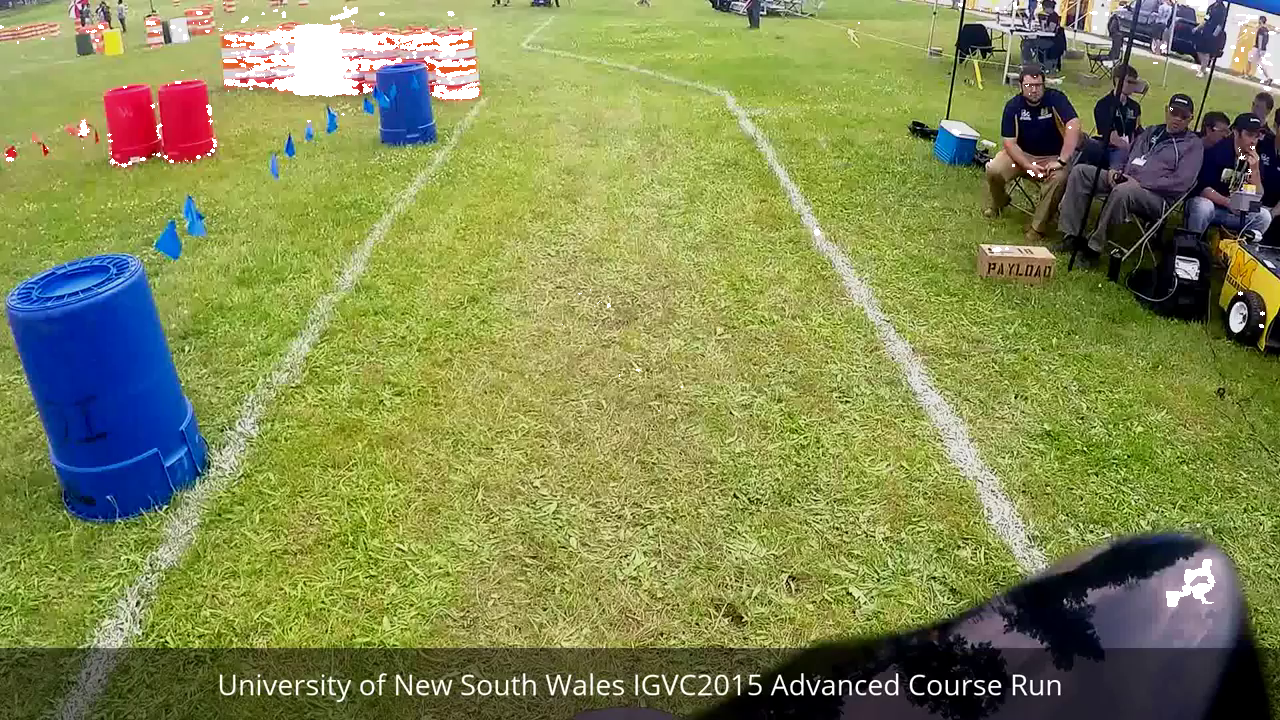

In [8]:
ret,thresh = cv2.threshold(res,225,255,cv2.THRESH_BINARY)

cv2_imshow(thresh)

final = cv2.merge((thresh,thresh,thresh))
result = cv2.bitwise_or(frame, final)

cv2_imshow(result)

3715


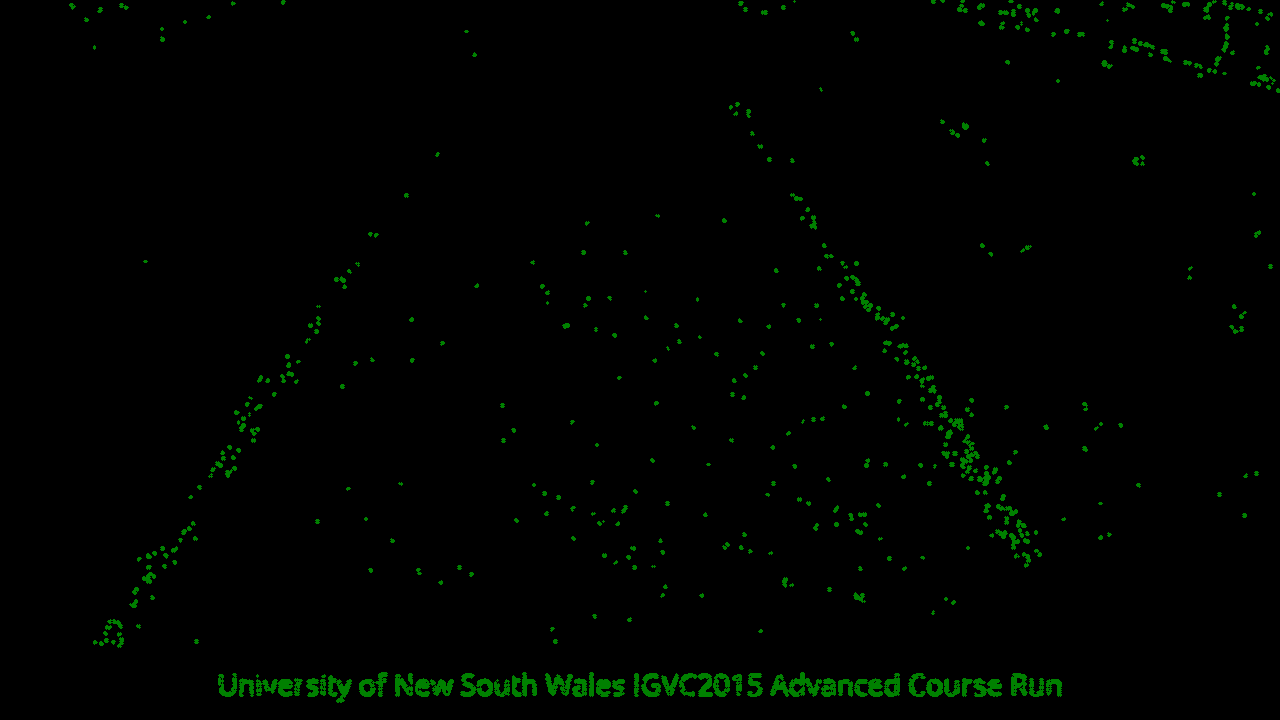

In [10]:
gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

mask = cv2.inRange(gray_frame, 240, 255)

mask_image = cv2.bitwise_and(gray_frame,gray_frame,mask = mask)

img_blur = cv2.GaussianBlur(mask_image, (3, 3), 0)
img_canny = cv2.Canny(img_blur, 70, 200)

kernel = np.array([[1/8,1/8,1/8],
                   [1/8,-1,1/8],
                   [1/8,1/8,1/8]])

lines = cv2.HoughLinesP(img_canny,1,np.pi/180,10,75,0)
line_img= np.zeros((img_canny.shape[0],img_canny.shape[1],3),dtype="uint8")
for line in lines:
   x1, y1, x2, y2 = line[0]
   cv2.line(line_img, (x1, y1), (x2, y2), (0,128,0), 2)

print(len(lines))
cv2_imshow(line_img)

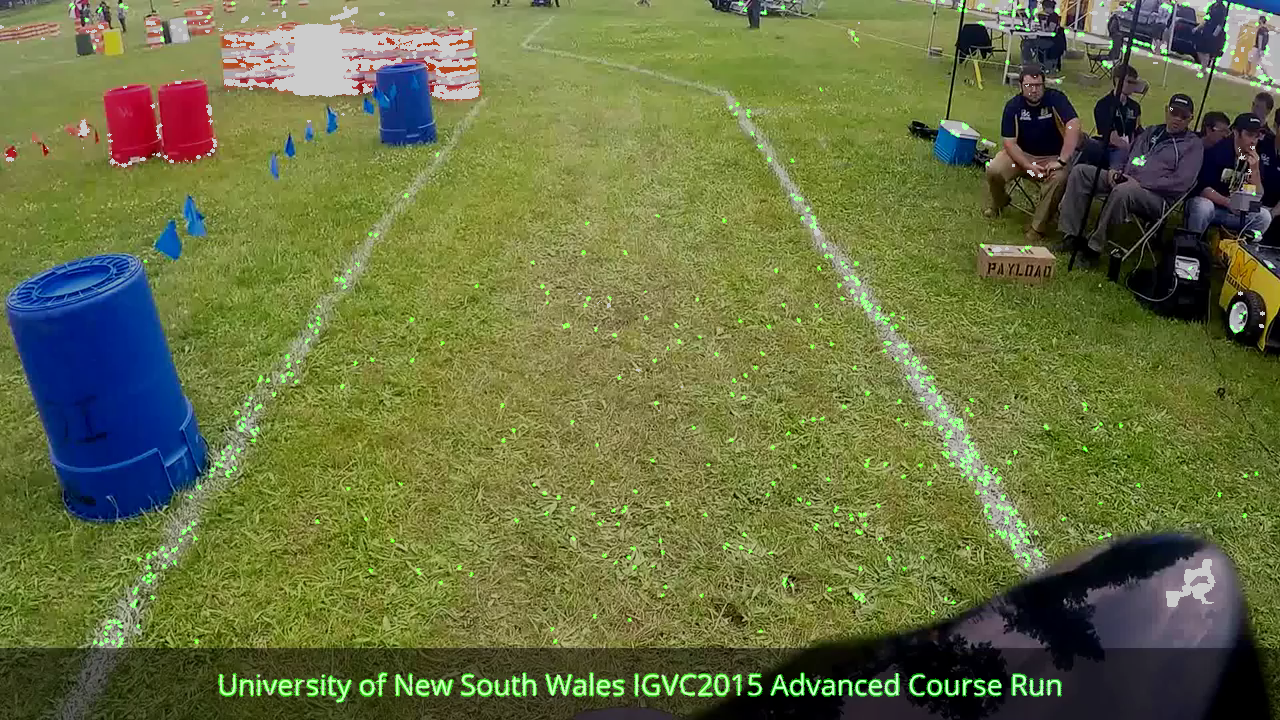

In [14]:
final_result = cv2.addWeighted(result,0.8,line_img,1,0)
cv2_imshow(final_result)